### Build a basic chatbot with langgraph(graph api)

In [14]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages


In [15]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)    

In [16]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [17]:
# Check if API key is loaded
print(f"GROQ_API_KEY loaded: {os.getenv('GROQ_API_KEY') is not None}")

from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq(model="llama3-8b-8192")

GROQ_API_KEY loaded: True


In [18]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x108efa850>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x108efb250>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [19]:
def chatbot(state:State):
    return{"messages":[llm.invoke(state["messages"])]}

In [20]:
graph_builder=StateGraph(State)
graph_builder.add_node("llmchatbot",chatbot)
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)
graph=graph_builder.compile()

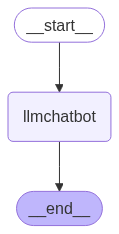

In [21]:
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [22]:
response=graph.invoke({"messages":"Hi"})

In [23]:
response["messages"][-1].content

"Hi! It's nice to meet you. Is there something I can help you with, or would you like to chat?"

Chatbot with tool

In [25]:
from langchain_tavily import TavilySearch
tool =TavilySearch(max_results=10)
tool.invoke("What is langgraph")



ValidationError: 1 validation error for TavilySearchAPIWrapper
  Value error, Did not find tavily_api_key, please add an environment variable `TAVILY_API_KEY` which contains it, or pass `tavily_api_key` as a named parameter. [type=value_error, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error